In [262]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.graph_objects as go
import plotly.io as pio
import plotly.express as px

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
import statsmodels.api as sm

from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder


import warnings
pd.set_option('display.max_columns', None)
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter('ignore', pd.errors.SettingWithCopyWarning)
warnings.simplefilter(action="ignore", category=pd.errors.PerformanceWarning)


Exploratory Data Analysis

explanation about eda

In [263]:
train = pd.read_csv('~/Documents/AmesHousingML/Ames_HousePrice.csv') 

In [264]:
train.head()

,Unnamed: 0,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,909176150,856,126000,30,RL,NaN,7890,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,SWISU,Norm,Norm,1Fam,1Story,6,6,1939,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,238.0,Unf,0.0,618.0,856.0,GasA,TA,Y,SBrkr,856,0,0,1.0,0.0,1,0,2,1,TA,4,Typ,1,Gd,Detchd,1939.0,Unf,2.0,399.0,TA,TA,Y,0,0,0,0,166,0,NaN,NaN,NaN,0,3,2010,WD,Normal
1,2,905476230,1049,139500,120,RL,42.0,4235,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,TwnhsE,1Story,5,5,1984,1984,Gable,CompShg,HdBoard,HdBoard,BrkFace,149.0,Gd,TA,CBlock,Gd,TA,Mn,GLQ,552.0,ALQ,393.0,104.0,1049.0,GasA,TA,Y,SBrkr,1049,0,0,1.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1984.0,Fin,1.0,266.0,TA,TA,Y,0,105,0,0,0,0,NaN,NaN,NaN,0,2,2009,WD,Normal
2,3,911128020,1001,124900,30,C (all),60.0,6060,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,5,9,1930,2007,Hip,CompShg,MetalSd,MetalSd,None,0.0,Gd,TA,BrkTil,TA,TA,No,ALQ,737.0,Unf,0.0,100.0,837.0,GasA,Ex,Y,SBrkr,1001,0,0,0.0,0.0,1,0,2,1,Gd,5,Typ,0,NaN,Detchd,1930.0,Unf,1.0,216.0,TA,Po,N,154,0,42,86,0,0,NaN,NaN,NaN,0,11,2007,WD,Normal
3,4,535377150,1039,114000,70,RL,80.0,8146,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,OldTown,Norm,Norm,1Fam,2Story,4,8,1900,2003,Gable,CompShg,MetalSd,MetalSd,None,0.0,Gd,Gd,BrkTil,Fa,TA,No,Unf,0.0,Unf,0.0,405.0,405.0,GasA,Gd,Y,SBrkr,717,322,0,0.0,0.0,1,0,2,1,TA,6,Typ,0,NaN,Detchd,1940.0,Unf,1.0,281.0,TA,TA,N,0,0,168,0,111,0,NaN,NaN,NaN,0,5,2009,WD,Normal
4,5,534177230,1665,227000,60,RL,70.0,8400,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,2Story,8,6,2001,2001,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,No,GLQ,643.0,Unf,0.0,167.0,810.0,GasA,Ex,Y,SBrkr,810,855,0,1.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,2001.0,Fin,2.0,528.0,TA,TA,Y,0,45,0,0,0,0,NaN,NaN,NaN,0,11,2009,WD,Normal


In [265]:
train.drop(columns="Unnamed: 0",inplace=True)

In [266]:
train.columns

Index(['PID', 'GrLivArea', 'SalePrice', 'MSSubClass', 'MSZoning',
       'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond

In [267]:
train.describe()

,PID,GrLivArea,SalePrice,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,2.580000e+03,2580.000000,2580.000000,2580.000000,2118.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2566.000000,2579.000000,2579.000000,2579.000000,2579.000000,2580.000000,2580.000000,2580.000000,2578.000000,2578.000000,2580.000000,2580.000000,2580.000000,2580.00000,2580.000000,2580.000000,2451.000000,2579.000000,2579.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000
mean,7.148300e+08,1486.039922,178059.623256,57.691860,68.516053,10120.153488,6.046124,5.618605,1970.313953,1983.751938,99.308262,444.346258,53.238852,539.101590,1036.686700,1144.975194,336.820155,4.244574,0.435221,0.062064,1.550775,0.378295,2.850388,1.04031,6.387209,0.604264,1976.982048,1.747577,466.842575,95.919767,46.085271,23.214341,2.511240,16.200388,1.662016,48.731395,6.150775,2007.838372
std,1.886626e+08,488.650181,75031.089374,42.802105,22.835831,8126.937892,1.367590,1.122008,29.719705,20.490242,175.872330,429.334957,174.423920,425.199639,418.555417,375.958955,424.072452,44.403603,0.518827,0.244513,0.545825,0.499237,0.822863,0.20255,1.535186,0.648604,24.659801,0.738678,207.476842,129.052016,66.060664,64.107825,25.293935,56.824783,30.339396,498.725058,2.670647,1.312333
min,5.263011e+08,334.000000,12789.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,2.000000,0.000000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,5.313630e+08,1112.000000,129975.000000,20.000000,57.000000,7406.750000,5.000000,5.000000,1953.000000,1965.000000,0.000000,0.000000,0.000000,215.000000,792.000000,871.750000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.00000,5.000000,0.000000,1960.000000,1.000000,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,5.354546e+08,1436.000000,159900.000000,50.000000,68.000000,9391.000000,6.000000,5.000000,1972.000000,1992.000000,0.000000,384.000000,0.000000,448.000000,979.000000,1071.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.00000,6.000000,1.000000,1978.000000,2.000000,474.000000,0.000000,25.500000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,9.071811e+08,1733.000000,209625.000000,70.000000,80.000000,11494.000000,7.000000,6.000000,1999.000000,2003.000000,158.000000,732.000000,0.000000,784.000000,1266.500000,1364.000000,703.000000,0.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.00000,7.000000,1.000000,2000.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,1.007100e+09,4676.000000,755000.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,2288.000000,1526.000000,2336.000000,3206.000000,3820.000000,1872.000000,1064.000000,3.000000,2.000000,4.000000,2.000000,6.000000,3.00000,13.000000,4.000000,2010.000000,5.000000,1488.000000,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,15500.000000,12.000000,2010.000000


# Data Preprocessing and Cleaning

In [268]:
train.shape

(2580, 81)

In [269]:
train = train.drop_duplicates()

In [270]:
nulls = train.isnull().sum()
nulls[nulls > 0]

LotFrontage      462
Alley           2411
MasVnrType        14
MasVnrArea        14
BsmtQual          69
BsmtCond          69
BsmtExposure      71
BsmtFinType1      69
BsmtFinSF1         1
BsmtFinType2      70
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
Electrical         1
BsmtFullBath       2
BsmtHalfBath       2
FireplaceQu     1241
GarageType       127
GarageYrBlt      129
GarageFinish     129
GarageCars         1
GarageArea         1
GarageQual       129
GarageCond       129
PoolQC          2570
Fence           2054
MiscFeature     2482
dtype: int64

For no particular reason, I'll start data cleaning with garage and its following columns to remove nan for a more complete dataframe.

In [271]:
train.GarageType.unique()

array(['Detchd', 'Attchd', 'BuiltIn', 'Basment', nan, '2Types', 'CarPort'],
      dtype=object)

In [272]:
train['GarageType'].fillna('NoGarage', inplace=True)

In [273]:
train.GarageType.unique()

array(['Detchd', 'Attchd', 'BuiltIn', 'Basment', 'NoGarage', '2Types',
       'CarPort'], dtype=object)

In [274]:
train[train.GarageYrBlt.isna()].GarageType.unique()

array(['NoGarage', 'Detchd'], dtype=object)

In [275]:
train['GarageYrBlt'].fillna(0, inplace=True)

In [276]:
train['GarageType'].fillna(0, inplace=True)

In [277]:
train['GarageFinish'].fillna('NoGarage', inplace=True)

In [278]:
train['GarageQual'].fillna('NoGarage', inplace=True)

In [279]:
train['GarageCond'].fillna('NoGarage', inplace=True)

In [280]:
train['Alley'].fillna('NoAlley', inplace=True)

In [281]:
train.Neighborhood.unique()

array(['SWISU', 'Edwards', 'IDOTRR', 'OldTown', 'NWAmes', 'Blmngtn',
       'Mitchel', 'NridgHt', 'NAmes', 'CollgCr', 'SawyerW', 'MeadowV',
       'BrDale', 'Gilbert', 'Timber', 'Somerst', 'BrkSide', 'NoRidge',
       'Sawyer', 'Crawfor', 'Greens', 'ClearCr', 'GrnHill', 'StoneBr',
       'Veenker', 'NPkVill', 'Blueste', 'Landmrk'], dtype=object)

In [282]:
print(train[["LotFrontage", "Neighborhood"]].query("Neighborhood == 'CollgCr'").median())
print(train[["LotFrontage", "Neighborhood"]].query("Neighborhood == 'Somerst'").median())
print(train[["LotFrontage", "Neighborhood"]].query("Neighborhood == 'Gilbert'").median())
print(train[["LotFrontage", "Neighborhood"]].query("Neighborhood == 'BrDale'").median())

LotFrontage    70.0
dtype: float64
LotFrontage    72.0
dtype: float64
LotFrontage    63.0
dtype: float64
LotFrontage    21.0
dtype: float64


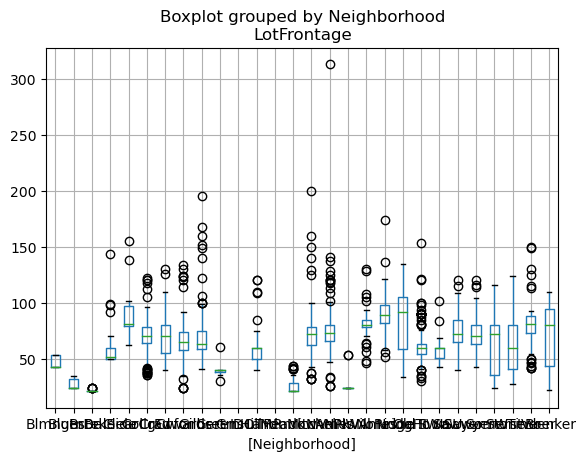

In [283]:
fig = train[['LotFrontage', 'Neighborhood']].boxplot(by='Neighborhood')
#plt.xticks(rotation=90)
plt.show()

I saw that the median values for each neighborhood varied, therefore I believe it would be irresponsible to use a shared median or mean among all missing values. Therefore, I will use the median value specific to the neighborhood that the house is located.

In [284]:
# Fill missing values in 'LotFrontage' column with median based on 'Neighborhood'
train['LotFrontage'] = train.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

In [285]:
train.FireplaceQu.unique()

array(['Gd', nan, 'Ex', 'TA', 'Fa', 'Po'], dtype=object)

In [286]:
train['FireplaceQu'].fillna("NoFireplace", inplace=True)

In [287]:
train.MasVnrType.unique()

array(['None', 'BrkFace', 'Stone', 'BrkCmn', nan], dtype=object)

In [288]:
train['MasVnrType'].fillna("None", inplace=True)

In [289]:
train['MasVnrArea'].fillna(0, inplace=True)

In [290]:
print(train.BsmtQual.unique())
print(train.BsmtCond.unique())
print(train.BsmtExposure.unique())
print(train.BsmtFinType1.unique())
print(train.BsmtFinType2.unique())

['TA' 'Gd' 'Fa' nan 'Ex' 'Po']
['TA' nan 'Fa' 'Gd' 'Ex' 'Po']
['No' 'Mn' nan 'Gd' 'Av']
['Rec' 'GLQ' 'ALQ' 'Unf' nan 'BLQ' 'LwQ']
['Unf' 'ALQ' nan 'GLQ' 'BLQ' 'LwQ' 'Rec']


In [291]:
train['BsmtQual'].fillna("NoBsmt", inplace=True)
train['BsmtCond'].fillna("NoBsmt", inplace=True)
train['BsmtExposure'].fillna("NoBsmt", inplace=True)
train['BsmtFinType1'].fillna("NoBsmt", inplace=True)
train['BsmtFinType2'].fillna("NoBsmt", inplace=True)

In [292]:
train.Electrical.value_counts()

SBrkr    2364
FuseA     168
FuseF      39
FuseP       7
Name: Electrical, dtype: int64

In [293]:
train['Electrical'].fillna("SBrkr", inplace=True)

Below we evaluate MiscFeature, which seemed to have a large amount of null values.

In [294]:
train.MiscFeature.unique()

array([nan, 'Shed', 'Othr', 'Gar2', 'TenC'], dtype=object)

In [295]:
train.MiscFeature.value_counts()

Shed    88
Gar2     5
Othr     3
TenC     1
Name: MiscFeature, dtype: int64

In [296]:
#looking at the total percentage of houses that include a MiscFeature... which is below 5%
((train.MiscFeature.isna().count() - train.MiscFeature.isna().sum()) / (train.MiscFeature.isna().count()) ) * 100

3.7611477316789452

In [297]:
#I figure removing the column from the dataset may be better 
# and easier than trying to find a way to include it in the analysis
train.drop('MiscFeature', axis=1, inplace=True)

In [298]:
# as well I have to remove the values associated with the MiscFeature
train.drop('MiscVal', axis=1, inplace=True)

Below I will do the same with PoolQC and PoolSF

In [299]:
((train.PoolQC.isna().count() - train.PoolQC.isna().sum()) / (train.PoolQC.isna().count()) ) * 100

0.34897246994959286

In [300]:
#I figure removing the column from the dataset may be better 
# and easier than trying to find a way to include it in the analysis
train.drop('PoolQC', axis=1, inplace=True)

In [301]:
train.drop('PoolArea', axis=1, inplace=True)

In [302]:
train['Fence'].fillna("NoFence", inplace=True)

In [303]:
nulls = train.isnull().sum()
nulls[nulls > 0]

LotFrontage     3
BsmtFinSF1      1
BsmtFinSF2      1
BsmtUnfSF       1
TotalBsmtSF     1
BsmtFullBath    2
BsmtHalfBath    2
GarageCars      1
GarageArea      1
dtype: int64

In [304]:
train[train.LotFrontage.isna()]

,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,Fence,MoSold,YrSold,SaleType,SaleCondition
109,916253320,1502,330000,120,RM,NaN,9763,Pave,NoAlley,IR1,Lvl,AllPub,Inside,Gtl,GrnHill,Norm,Norm,TwnhsE,1Story,7,5,1998,1998,Gable,CompShg,Wd Sdng,Wd Sdng,BrkFace,239.0,Gd,TA,PConc,Gd,TA,No,GLQ,1102.0,ALQ,72.0,328.0,1502.0,GasA,Ex,Y,SBrkr,1502,0,0,1.0,0.0,1,1,1,1,Gd,5,Typ,1,TA,Attchd,1998.0,Fin,1.0,286.0,TA,TA,Y,0,0,0,0,0,NoFence,9,2007,WD,Normal
683,916252170,1295,230000,120,RM,NaN,8239,Pave,NoAlley,IR1,Lvl,AllPub,Inside,Gtl,GrnHill,Norm,Norm,TwnhsE,1Story,7,5,1986,1986,Gable,CompShg,BrkFace,Wd Sdng,None,0.0,Gd,TA,CBlock,NoBsmt,NoBsmt,NoBsmt,NoBsmt,0.0,NoBsmt,0.0,0.0,0.0,GasA,Gd,Y,SBrkr,1295,0,0,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NoFireplace,Attchd,1986.0,RFn,1.0,312.0,TA,TA,Y,0,0,0,0,0,NoFence,11,2006,WD,Normal
1204,907230240,1320,137000,160,RH,NaN,3612,Pave,NoAlley,IR1,Lvl,AllPub,Inside,Gtl,Landmrk,Norm,Norm,Twnhs,2Story,6,5,1993,1994,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,338.0,Unf,0.0,292.0,630.0,GasA,Ex,Y,SBrkr,630,690,0,0.0,0.0,2,1,3,1,TA,5,Typ,0,NoFireplace,Detchd,1993.0,Unf,2.0,484.0,TA,TA,Y,0,48,0,0,0,MnPrv,6,2006,WD,Normal


In [305]:
train

,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,Fence,MoSold,YrSold,SaleType,SaleCondition
0,909176150,856,126000,30,RL,60.0,7890,Pave,NoAlley,Reg,Lvl,AllPub,Corner,Gtl,SWISU,Norm,Norm,1Fam,1Story,6,6,1939,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,238.0,Unf,0.0,618.0,856.0,GasA,TA,Y,SBrkr,856,0,0,1.0,0.0,1,0,2,1,TA,4,Typ,1,Gd,Detchd,1939.0,Unf,2.0,399.0,TA,TA,Y,0,0,0,0,166,NoFence,3,2010,WD,Normal
1,905476230,1049,139500,120,RL,42.0,4235,Pave,NoAlley,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,TwnhsE,1Story,5,5,1984,1984,Gable,CompShg,HdBoard,HdBoard,BrkFace,149.0,Gd,TA,CBlock,Gd,TA,Mn,GLQ,552.0,ALQ,393.0,104.0,1049.0,GasA,TA,Y,SBrkr,1049,0,0,1.0,0.0,2,0,2,1,Gd,5,Typ,0,NoFireplace,Attchd,1984.0,Fin,1.0,266.0,TA,TA,Y,0,105,0,0,0,NoFence,2,2009,WD,Normal
2,911128020,1001,124900,30,C (all),60.0,6060,Pave,NoAlley,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,5,9,1930,2007,Hip,CompShg,MetalSd,MetalSd,None,0.0,Gd,TA,BrkTil,TA,TA,No,ALQ,737.0,Unf,0.0,100.0,837.0,GasA,Ex,Y,SBrkr,1001,0,0,0.0,0.0,1,0,2,1,Gd,5,Typ,0,NoFireplace,Detchd,1930.0,Unf,1.0,216.0,TA,Po,N,154,0,42,86,0,NoFence,11,2007,WD,Normal
3,535377150,1039,114000,70,RL,80.0,8146,Pave,NoAlley,Reg,Lvl,AllPub,Corner,Gtl,OldTown,Norm,Norm,1Fam,2Story,4,8,1900,2003,Gable,CompShg,MetalSd,MetalSd,None,0.0,Gd,Gd,BrkTil,Fa,TA,No,Unf,0.0,Unf,0.0,405.0,405.0,GasA,Gd,Y,SBrkr,717,322,0,0.0,0.0,1,0,2,1,TA,6,Typ,0,NoFireplace,Detchd,1940.0,Unf,1.0,281.0,TA,TA,N,0,0,168,0,111,NoFence,5,2009,WD,Normal
4,534177230,1665,227000,60,RL,70.0,8400,Pave,NoAlley,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,2Story,8,6,2001,2001,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,No,GLQ,643.0,Unf,0.0,167.0,810.0,GasA,Ex,Y,SBrkr,810,855,0,1.0,0.0,2,1,3,1,Gd,6,Typ,0,NoFireplace,Attchd,2001.0,Fin,2.0,528.0,TA,TA,Y,0,45,0,0,0,NoFence,11,2009,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2575,903205040,952,121000,30,RL,51.5,8854,Pave,NoAlley,Reg,Lvl,AllPub,Inside,Gtl,BrkSide,Norm,Norm,1Fam,1.5Unf,6,6,1916,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0.0,Unf,0.0,952.0,952.0,Grav,Fa,N,FuseF,952,0,0,0.0,0.0,1,0,2,1,Fa,4,Typ,1,Gd,Detchd,1916.0,Unf,1.0,192.0,Fa,Po,P,0,98,0,0,40,NoFence,5,2009,WD,Normal
2576,905402060,1733,139600,20,RL,65.0,13680,Pave,NoAlley,IR1,Lvl,AllPub,CulDSac,Gtl,Edwards,Norm,Norm,1Fam,1Story,3,5,1955,1955,Hip,CompShg,BrkFace,Wd Sdng,None,0.0,TA,TA,Slab,NoBsmt,NoBsmt,NoBsmt,NoBsmt,0.0,NoBsmt,0.0,0.0,0.0,GasA,Ex,Y,FuseA,1733,0,0,0.0,0.0,2,0,4,1,TA,8,Min2,1,Gd,Attchd,1955.0,Unf,2.0,452.0,TA,TA,Y,0,0,0,0,0,NoFence,6,2009,WD,Normal
2577,909275030,2002,145000,90,RH,82.0,6270,Pave,NoAlley,Reg,HLS,AllPub,Inside,Gtl,Crawfor,Norm,Norm,Duplex,2Story,5,6,1949,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,No,BLQ,284.0,Unf,0.0,717.0,1001.0,GasA,TA,N,FuseA,1001,1001,0,0.0,0.0,2,0,4,2,TA,8,Typ,0,NoFireplace,2Types,1949.0,Unf,3.0,871.0,TA,TA,Y,0,0,0,0,0,NoFence,8,2007,WD,Normal
2578,907192040,1842,217500,60,RL,70.0,8826,Pave,NoAlley,

In [306]:
# used the following commented code to check specific cases of the LotFootage not cleaning correctly
# turns out there were a few neighborhoods that don't have any values in the column, very minimal ~3
# train[train.PID == 916253320]
# train.Neighborhood.value_counts()
train = train[(train['Neighborhood'] != 'GrnHill') & (train['Neighborhood'] != 'Landmrk')]

In [307]:
#train[train['BsmtFinSF1'].isna()] #one edge case where there is no bsmt so set zeroes, same for rest
train['BsmtFinSF1'].fillna(0, inplace=True)   
train['BsmtFinSF2'].fillna(0, inplace=True)   
train['BsmtUnfSF'].fillna(0, inplace=True)   
train['TotalBsmtSF'].fillna(0, inplace=True)   
train['BsmtFullBath'].fillna(0, inplace=True)   
train['BsmtHalfBath'].fillna(0, inplace=True)   
train['GarageCars'].fillna(0, inplace=True)   
train['GarageArea'].fillna(0, inplace=True)   

In [308]:
nulls = train.isnull().sum()
nulls[nulls > 0]

Series([], dtype: int64)

We have cleaned the missing values.

# Exploratory Data Analysis

The sale price of the houses in the dataset have a right skew.

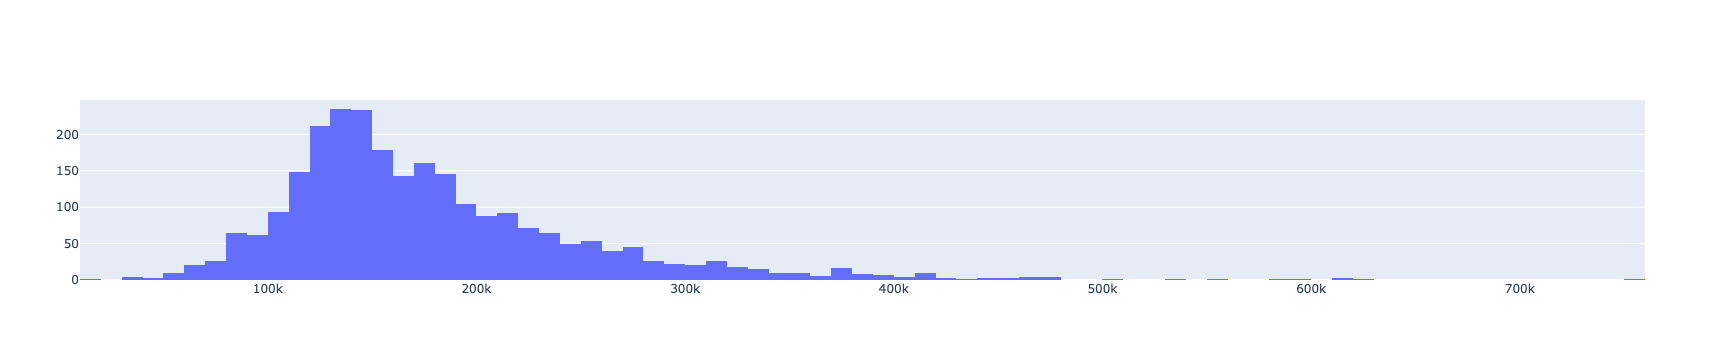

In [309]:
sp_fig = go.Figure(data=[go.Histogram(x=train.SalePrice)])
sp_fig

In [310]:
train.SalePrice.describe()

count      2576.000000
mean     177990.228261
std       75017.585880
min       12789.000000
25%      129900.000000
50%      159900.000000
75%      209500.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [311]:
train[train["SalePrice"] < 35000]

,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,Fence,MoSold,YrSold,SaleType,SaleCondition
427,902207130,832,12789,30,RM,68.0,9656,Pave,NoAlley,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1Story,2,2,1923,1970,Gable,CompShg,AsbShng,AsbShng,None,0.0,TA,Fa,BrkTil,Fa,Fa,No,Unf,0.0,Unf,0.0,678.0,678.0,GasA,TA,N,SBrkr,832,0,0,0.0,0.0,1,0,2,1,TA,5,Typ,1,Gd,Detchd,1928.0,Unf,2.0,780.0,Fa,Fa,N,0,0,0,0,0,NoFence,6,2010,WD,Abnorml
558,902477120,720,34900,30,C (all),60.0,7879,Pave,NoAlley,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,4,5,1920,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,495.0,Unf,0.0,225.0,720.0,GasA,TA,N,FuseA,720,0,0,0.0,0.0,1,0,2,1,TA,4,Typ,0,NoFireplace,NoGarage,0.0,NoGarage,0.0,0.0,NoGarage,NoGarage,N,0,523,115,0,0,GdWo,11,2009,WD,Abnorml


The mean is higher than the median, and we can see many outliers, which can impact the results of our models.

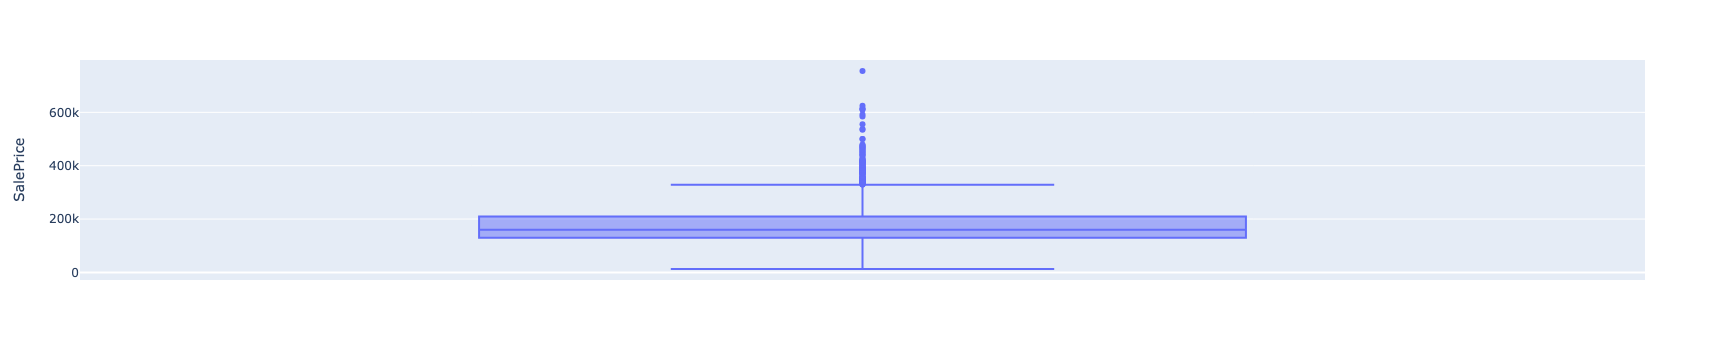

In [312]:
px.box(train,y='SalePrice')

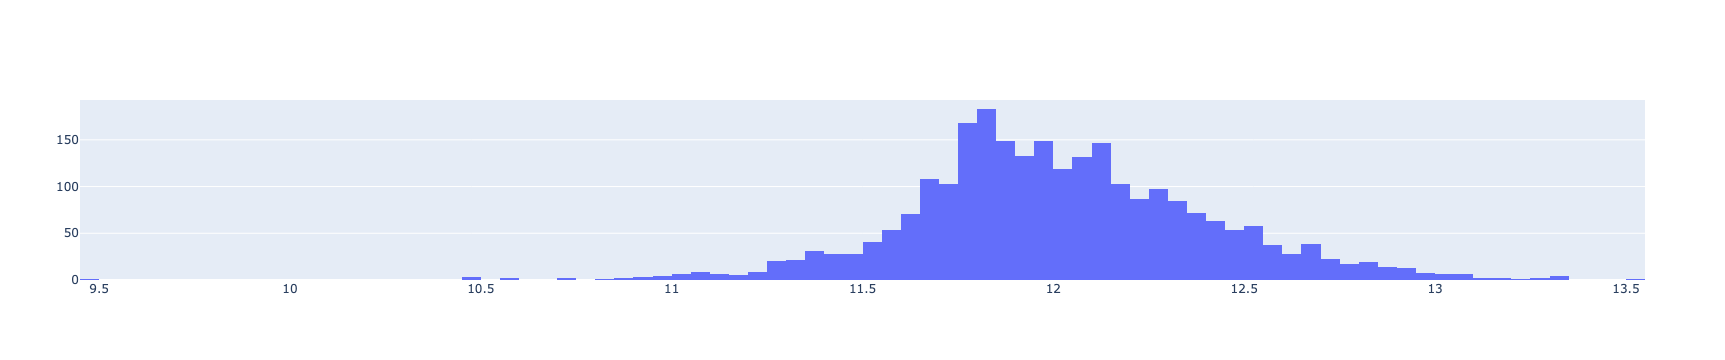

In [313]:
go.Figure(data=[go.Histogram(x=np.log(train.SalePrice))])

In [314]:
logSalePrice = np.log(train.SalePrice)

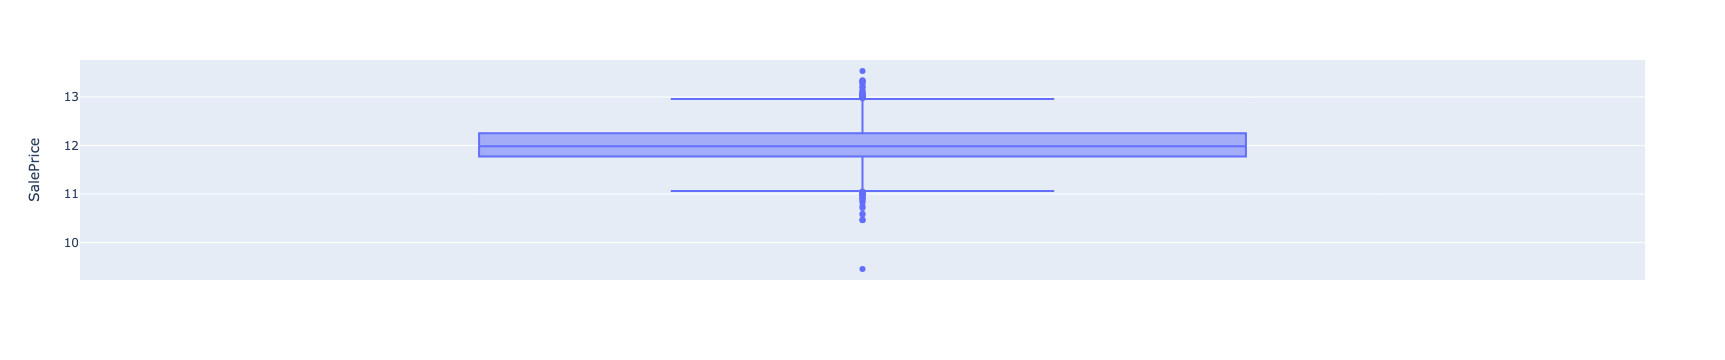

In [315]:
px.box(logSalePrice,y='SalePrice')

As we can see, there are many outliers in the data. Although the typical accepted range is usually 1.5 times the IQR, we will do 3 times the IQR to try and conserve some of the value in those outliers

## Finding & Dealing with Outliers

In [316]:
train.shape

(2576, 77)

In [317]:
# Q1 = train['SalePrice'].quantile(.25)
# Q3 = train['SalePrice'].quantile(.75)
# IQR = Q3 - Q1
# new_bounds = Q3 + 3 * IQR

In [318]:
# train.drop(train[train['SalePrice'] > new_bounds].index, axis=0, inplace = True)

In [319]:
train.shape

(2576, 77)

In [320]:
#train set - outliers comes out to 23 records removed
2576 - 2553

23

This now looks a bit better than our first box plot of the SalePrice untouched

Lets look at a correlation of the numeric features in the dataset

Lets look at the categorical variables as well:

In [321]:
# train_cats = train.select_dtypes(exclude=[np.number])

# train_cats_encoded = pd.get_dummies(train, columns=train_cats.columns, drop_first=True)

# train_cats_encoded

In [322]:
train.dtypes.value_counts()

object     41
int64      25
float64    11
dtype: int64

In [323]:
OH_encoder = OneHotEncoder(sparse_output = False, drop = 'first')
cat_cols = list(train.select_dtypes(include='object').columns)
encoded_nums = OH_encoder.fit_transform(train[cat_cols])
encoded_cols = list(OH_encoder.get_feature_names_out())
train[encoded_cols] = encoded_nums
train = train.drop(columns=cat_cols)
train

,PID,GrLivArea,SalePrice,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MoSold,YrSold,MSZoning_C (all),MSZoning_FV,MSZoning_I (all),MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_NoAlley,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSewr,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_PreCast,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_PreCast,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_NoBsmt,BsmtQual_Po,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_NoBsmt,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_NoBsmt,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_NoBsmt,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_NoBsmt,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_Po,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sal,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_NoFireplace,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NoGarage,GarageFinish_NoGarage,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_NoGarage,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_NoGarage,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_NoFence,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_VWD,SaleType_WD,SaleCondition_AdjLand,SaleCondit

# Feature Engineering

In [324]:
train['TotalHouseSF'] = train['1stFlrSF'] + train['2ndFlrSF'] + train['TotalBsmtSF']
train.TotalHouseSF

0       1712.0
1       2098.0
2       1838.0
3       1444.0
4       2475.0
         ...  
2575    1904.0
2576    1733.0
2577    3003.0
2578    2827.0
2579    2688.0
Name: TotalHouseSF, Length: 2576, dtype: float64

In [325]:
train['TotalBathroomCount'] = train['BsmtFullBath'] + train['FullBath'] + (0.5 * train['BsmtHalfBath']) + (0.5 * train['HalfBath'])
train.TotalBathroomCount

# BsmtFullBath: Basement full bathrooms

# BsmtHalfBath: Basement half bathrooms

# FullBath: Full bathrooms above grade

# HalfBath: Half baths above grade

0       2.0
1       3.0
2       1.0
3       1.0
4       3.5
       ... 
2575    1.0
2576    2.0
2577    2.0
2578    3.5
2579    2.5
Name: TotalBathroomCount, Length: 2576, dtype: float64

I saw there was alot of mention of SF for outdoor additions to houses, I wanted to create a way to encapture the value there:

In [326]:
train['QualityOutdoorSF'] = train['WoodDeckSF'] + train['OpenPorchSF'] + train['EnclosedPorch'] + train['3SsnPorch'] + train['ScreenPorch'] # + train['PoolArea']

# WoodDeckSF: Wood deck area in square feet

# OpenPorchSF: Open porch area in square feet

# EnclosedPorch: Enclosed porch area in square feet

# 3SsnPorch: Three season porch area in square feet

# ScreenPorch: Screen porch area in square feet

# PoolArea: Pool area in square feet ---- already removed this column

train.QualityOutdoorSF

Also, two of our higher predicting was YrBuilt and YrRemodAdd, can we combine somehow to get that value out of one feature?

In [327]:
train['YearAndRemodAvg'] = (train['YearRemodAdd'] + train['YearBuilt'])/2

Potentially a lot_frontage to lot_size ratio?







FullHouseSF - Lot Size?

In [328]:
train['NonHouseSF'] = train['TotalHouseSF'] - train['LotArea']

Quality in house stuff?

In [329]:
#LowQualFinSF: Low quality finished square feet (all floors)
train['HighQualFinSF'] = train['TotalHouseSF'] - train['LowQualFinSF']

In [330]:
train.columns

Index(['PID', 'GrLivArea', 'SalePrice', 'MSSubClass', 'LotFrontage', 'LotArea',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       ...
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial', 'TotalHouseSF', 'TotalBathroomCount',
       'QualityOutdoorSF', 'YearAndRemodAvg', 'NonHouseSF', 'HighQualFinSF'],
      dtype='object', length=263)

In [331]:
train['HouseLotRatio'] = train['TotalHouseSF'] / train['LotArea'] * 100
train['FrontageLotRatio'] = train['LotFrontage'] / train['LotArea'] * 100
train['QualityOutdoorLotRatio'] = train['QualityOutdoorSF'] / train['LotArea'] * 100


In [332]:
train.shape

(2576, 266)

## Fixing Outliers & Dropping PID

A typical removal of outliers is 1.5 * IQR, since it is expanded far past the third quartile we will test and experiment with double that, 3*IQR

In [333]:
# outlier_threshold = 3
# Q1 = train['SalePrice'].quantile(.25)
# Q3 = train['SalePrice'].quantile(.75)
# IQR = Q3 - Q1
# new_bounds = Q3 + outlier_threshold * IQR
# train.drop(train[train['SalePrice'] > new_bounds].index, axis=0, inplace = True)

PID is a record index and will not have a meaningful impact on our model that makes sense. We will remove it before export to avoid inaccurate analyses.

In [334]:
train = train.drop('PID', axis=1)

train.head()

,GrLivArea,SalePrice,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MoSold,YrSold,MSZoning_C (all),MSZoning_FV,MSZoning_I (all),MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_NoAlley,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSewr,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_PreCast,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_PreCast,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_NoBsmt,BsmtQual_Po,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_NoBsmt,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_NoBsmt,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_NoBsmt,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_NoBsmt,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_Po,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sal,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_NoFireplace,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NoGarage,GarageFinish_NoGarage,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_NoGarage,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_NoGarage,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_NoFence,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_VWD,SaleType_WD,SaleCondition_AdjLand,SaleCondition_

Below to confirm the removal of PID and outliers was successful.

In [335]:
train.shape

(2576, 265)

<Axes: ylabel='SalePrice'>

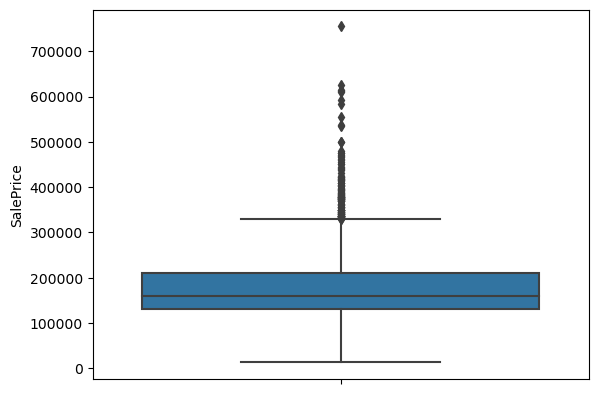

In [336]:
sns.boxplot(y=train.SalePrice)

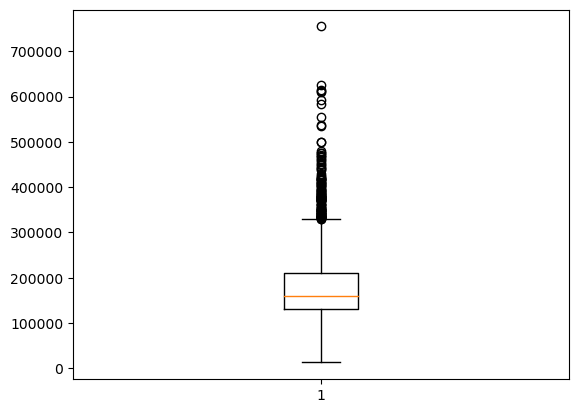

In [337]:
plt.boxplot(train['SalePrice'])
plt.show()

In [338]:
salep = train.copy()
outlier_threshold = 3
Q1 = salep['SalePrice'].quantile(.25)
Q3 = salep['SalePrice'].quantile(.75)
IQR = Q3 - Q1
new_bounds = Q3 + outlier_threshold * IQR
salep.drop(salep[salep['SalePrice'] > new_bounds].index, axis=0, inplace = True)

In [341]:
#onlyNormalCondition

normp = train.copy()
normp = normp[normp['SaleCondition_Normal'] == 1.0]

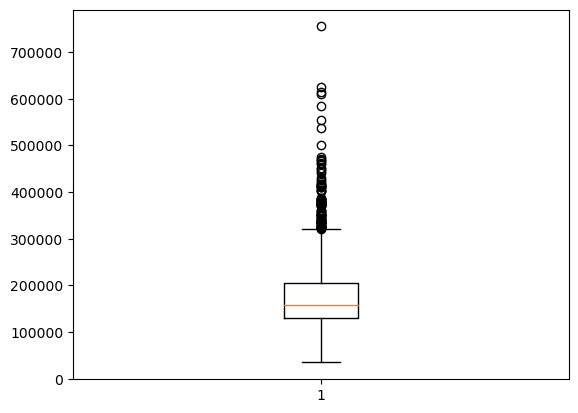

In [342]:
plt.boxplot(normp['SalePrice'])
plt.show()

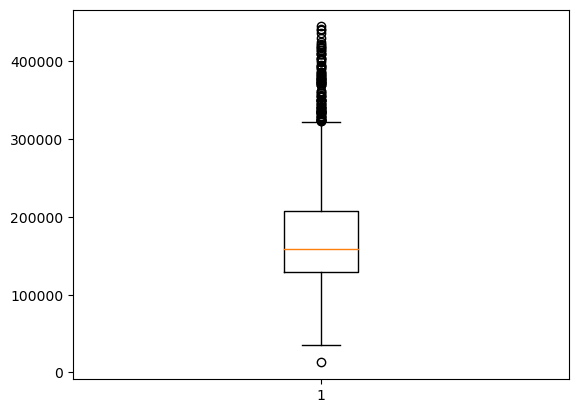

In [343]:
plt.boxplot(salep['SalePrice'])
plt.show()

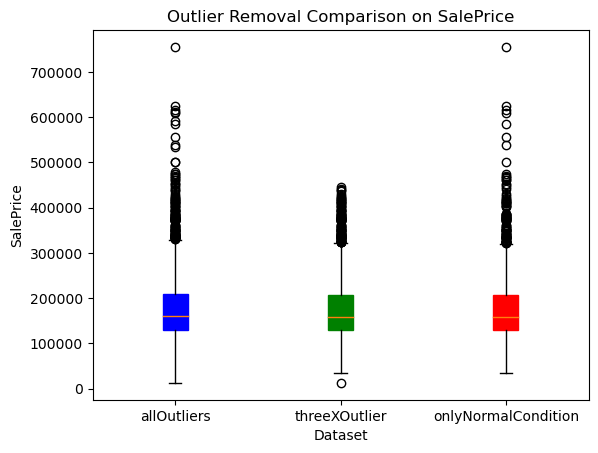

In [344]:
# Assuming 'train' and 'salep' are your DataFrames
train_box = plt.boxplot(train['SalePrice'], positions=[1], patch_artist=True, boxprops=dict(facecolor='blue', color='blue'))
salep_box = plt.boxplot(salep['SalePrice'], positions=[2], patch_artist=True, boxprops=dict(facecolor='green', color='green'))
normp_box = plt.boxplot(normp['SalePrice'], positions=[3], patch_artist=True, boxprops=dict(facecolor='red', color='red'))


# Customize the plot
plt.xticks([1, 2, 3], ['allOutliers', 'threeXOutlier', 'onlyNormalCondition'])
plt.title("Outlier Removal Comparison on SalePrice")
plt.xlabel("Dataset")
plt.ylabel("SalePrice")

# Add legends
#plt.legend([train_box["boxes"][0], salep_box["boxes"][0], normp_box['boxes'][0]], ['No Removal', '3 * IQR', 'onlyNormalCondition'])

plt.show()

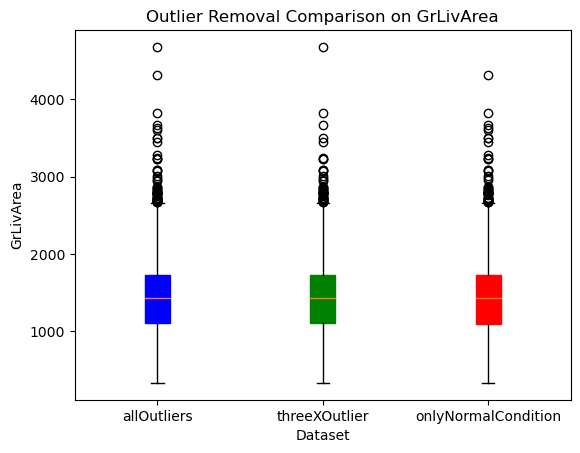

In [345]:
# Assuming 'train' and 'salep' are your DataFrames
train_box = plt.boxplot(train['GrLivArea'], positions=[1], patch_artist=True, boxprops=dict(facecolor='blue', color='blue'))
salep_box = plt.boxplot(salep['GrLivArea'], positions=[2], patch_artist=True, boxprops=dict(facecolor='green', color='green'))
normp_box = plt.boxplot(normp['GrLivArea'], positions=[3], patch_artist=True, boxprops=dict(facecolor='red', color='red'))


# Customize the plot
plt.xticks([1, 2, 3], ['allOutliers', 'threeXOutlier', 'onlyNormalCondition'])
plt.title("Outlier Removal Comparison on GrLivArea")
plt.xlabel("Dataset")
plt.ylabel("GrLivArea")

# Add legends
#plt.legend([train_box["boxes"][0], salep_box["boxes"][0], normp_box['boxes'][0]], ['No Removal', '3 * IQR', 'onlyNormalCondition'])

plt.show()

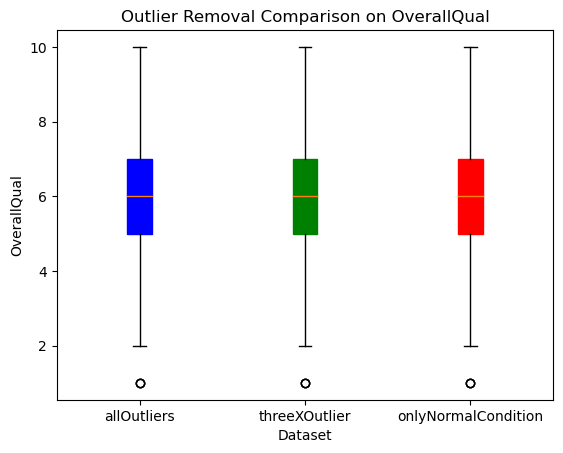

In [346]:
# Assuming 'train' and 'salep' are your DataFrames
train_box = plt.boxplot(train['OverallQual'], positions=[1], patch_artist=True, boxprops=dict(facecolor='blue', color='blue'))
salep_box = plt.boxplot(salep['OverallQual'], positions=[2], patch_artist=True, boxprops=dict(facecolor='green', color='green'))
normp_box = plt.boxplot(normp['OverallQual'], positions=[3], patch_artist=True, boxprops=dict(facecolor='red', color='red'))


# Customize the plot
plt.xticks([1, 2, 3], ['allOutliers', 'threeXOutlier', 'onlyNormalCondition'])
plt.title("Outlier Removal Comparison on OverallQual")
plt.xlabel("Dataset")
plt.ylabel("OverallQual")

# Add legends
#plt.legend([train_box["boxes"][0], salep_box["boxes"][0], normp_box['boxes'][0]], ['No Removal', '3 * IQR', 'onlyNormalCondition'])

plt.show()

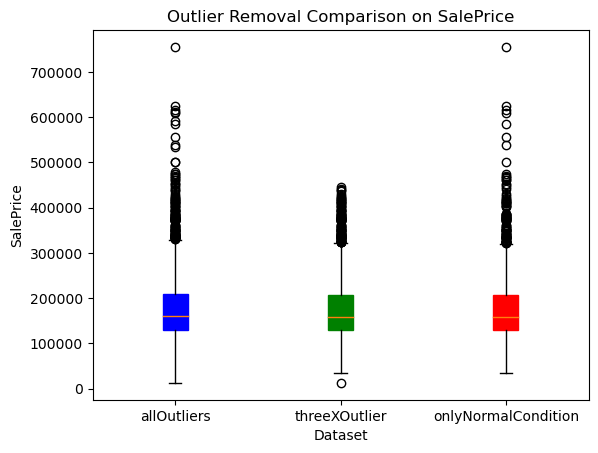

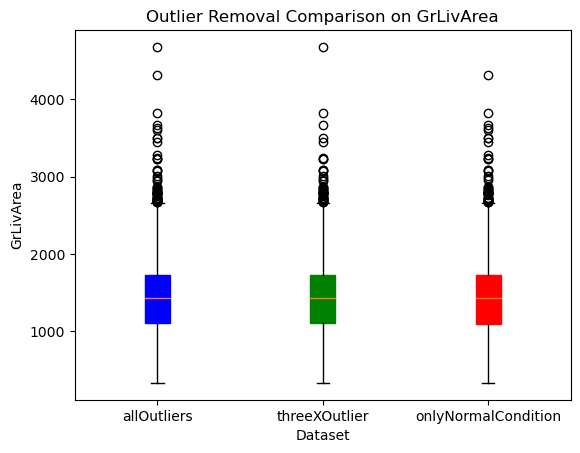

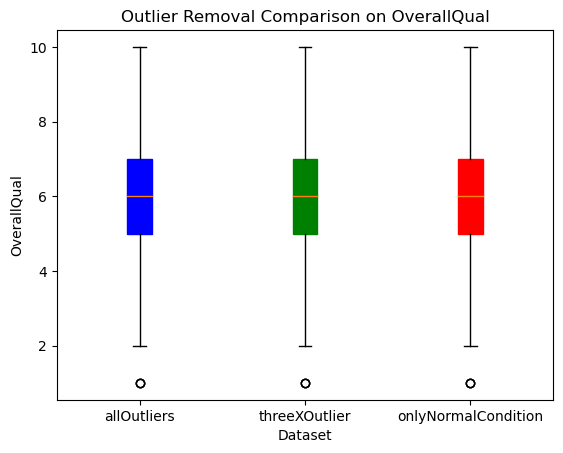

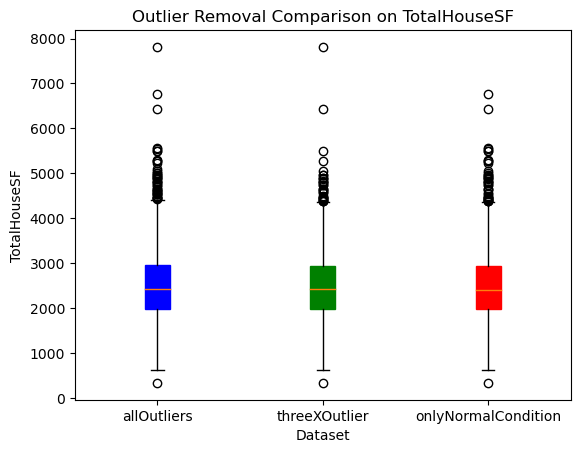

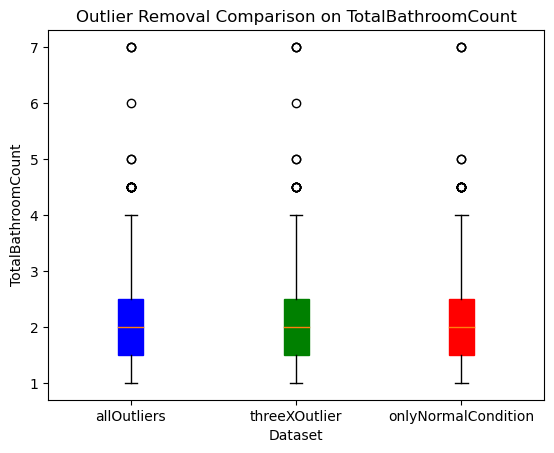

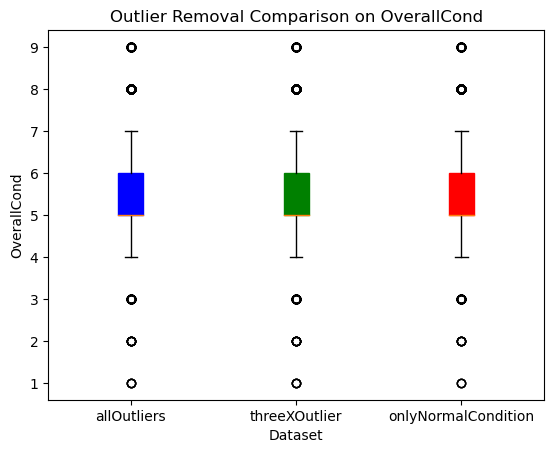

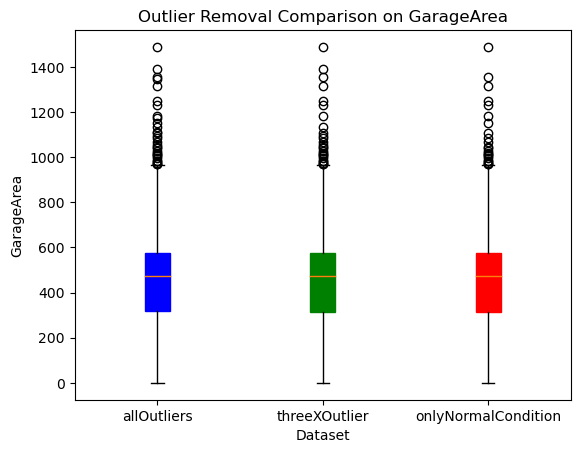

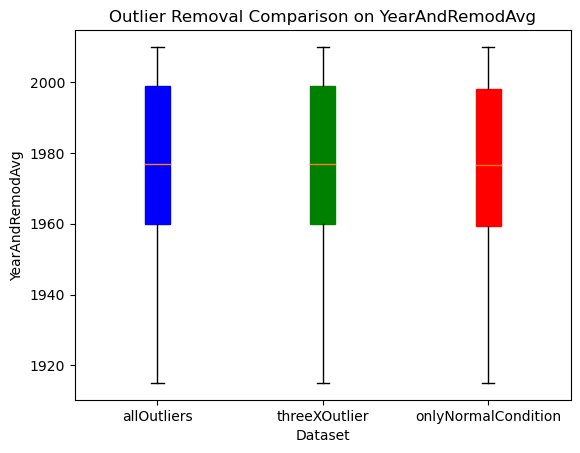

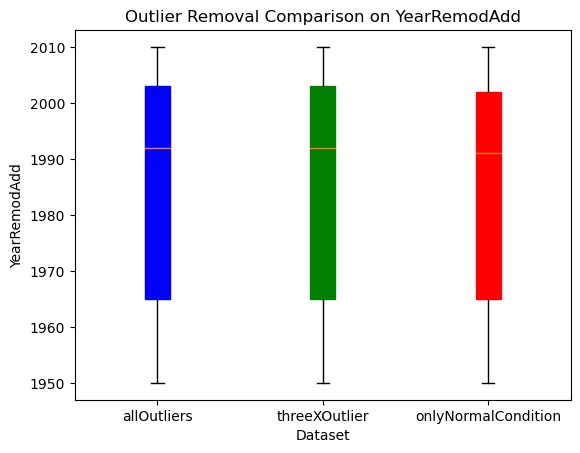

In [355]:
# Assuming 'train' and 'salep' are your DataFrames

inputs_list = ['SalePrice', 'GrLivArea', 'OverallQual', 'TotalHouseSF', 'TotalBathroomCount', 
               'OverallCond', 'GarageArea', 'YearAndRemodAvg', 'YearRemodAdd']

for inputs in inputs_list: 

    train_box = plt.boxplot(train[f'{inputs}'], positions=[1], patch_artist=True, 
                            boxprops=dict(facecolor='blue', color='blue'))
    salep_box = plt.boxplot(salep[f'{inputs}'], positions=[2], patch_artist=True, 
                            boxprops=dict(facecolor='green', color='green'))
    normp_box = plt.boxplot(normp[f'{inputs}'], positions=[3], patch_artist=True, 
                            boxprops=dict(facecolor='red', color='red'))


    # Customize the plot
    plt.xticks([1, 2, 3], ['allOutliers', 'threeXOutlier', 'onlyNormalCondition'])
    plt.title(f"Outlier Removal Comparison on {inputs}")
    plt.xlabel("Dataset")
    plt.ylabel(f"{inputs}")

    # Add legends
    #plt.legend([train_box["boxes"][0], salep_box["boxes"][0], normp_box['boxes'][0]], ['No Removal', '3 * IQR', 'onlyNormalCondition'])

    plt.show()